# Machine Learning 
### Narcís Terrado

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import Image
%matplotlib inline

## Data Set

In [2]:
box = pd.read_csv('boxing_matches.csv')
box.head()

,age_A,age_B,height_A,height_B,reach_A,reach_B,stance_A,stance_B,weight_A,weight_B,...,kos_A,kos_B,result,decision,judge1_A,judge1_B,judge2_A,judge2_B,judge3_A,judge3_B
0,35.0,27.0,179.0,175.0,178.0,179.0,orthodox,orthodox,160.0,160.0,...,33,34.0,draw,SD,110.0,118.0,115.0,113.0,114.0,114.0
1,26.0,31.0,175.0,185.0,179.0,185.0,orthodox,orthodox,164.0,164.0,...,34,32.0,win_A,UD,120.0,108.0,120.0,108.0,120.0,108.0
2,28.0,26.0,176.0,175.0,NaN,179.0,orthodox,orthodox,154.0,154.0,...,13,33.0,win_B,KO,NaN,NaN,NaN,NaN,NaN,NaN
3,25.0,29.0,175.0,174.0,179.0,180.0,orthodox,orthodox,155.0,155.0,...,32,19.0,win_A,KO,47.0,48.0,49.0,46.0,48.0,47.0
4,25.0,35.0,175.0,170.0,179.0,170.0,orthodox,orthodox,155.0,NaN,...,32,33.0,win_A,UD,118.0,110.0,119.0,109.0,117.0,111.0


In [3]:
box.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 387427 entries, 0 to 387426
Data columns (total 26 columns):
age_A       352888 non-null float64
age_B       257935 non-null float64
height_A    249246 non-null float64
height_B    134640 non-null float64
reach_A     112342 non-null float64
reach_B     37873 non-null float64
stance_A    231009 non-null object
stance_B    231009 non-null object
weight_A    135573 non-null float64
weight_B    130358 non-null float64
won_A       387427 non-null int64
won_B       387427 non-null int64
lost_A      387427 non-null int64
lost_B      387427 non-null int64
drawn_A     387427 non-null int64
drawn_B     387427 non-null int64
kos_A       387427 non-null int64
kos_B       387348 non-null float64
result      387427 non-null object
decision    387427 non-null object
judge1_A    52248 non-null float64
judge1_B    52060 non-null float64
judge2_A    70371 non-null float64
judge2_B    70032 non-null float64
judge3_A    61231 non-null float64
judge3_B    6

In [4]:
box.describe()

,age_A,age_B,height_A,height_B,reach_A,reach_B,weight_A,weight_B,won_A,won_B,...,drawn_A,drawn_B,kos_A,kos_B,judge1_A,judge1_B,judge2_A,judge2_B,judge3_A,judge3_B
count,352888.000000,257935.000000,249246.000000,134640.000000,112342.000000,37873.000000,135573.000000,130358.000000,387427.000000,387427.000000,...,387427.000000,387427.000000,387427.000000,387348.000000,52248.000000,52060.000000,70371.000000,70032.000000,61231.000000,61023.000000
mean,24.416041,26.583345,172.786657,172.882657,178.848605,179.001030,146.340636,147.089484,23.108438,15.159080,...,2.826481,2.636375,10.338887,6.234735,62.778901,59.509700,59.560941,56.570411,60.784276,57.995215
std,6.523590,11.823224,9.130127,9.430631,12.002404,14.867537,30.240142,30.624890,27.629901,19.938137,...,5.584610,5.027003,12.392049,8.750690,30.337580,29.285058,31.021367,30.260935,31.910461,31.170590
min,-74.000000,-74.000000,2.000000,15.000000,5.000000,1.000000,10.000000,2.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000
25%,21.000000,23.000000,166.000000,167.000000,170.000000,171.000000,125.000000,126.000000,5.000000,2.000000,...,0.000000,0.000000,2.000000,0.000000,39.000000,37.000000,39.000000,36.000000,39.000000,36.000000
50%,24.000000,26.000000,173.000000,173.000000,178.000000,178.000000,140.000000,140.000000,14.000000,8.000000,...,1.000000,1.000000,6.000000,3.000000,59.000000,54.000000,58.000000,54.000000,58.000000,54.000000
75%,27.000000,30.000000,178.000000,179.000000,185.000000,185.000000,160.000000,160.000000,31.000000,21.000000,...,3.000000,3.000000,14.000000,9.000000,80.000000,79.000000,80.000000,75.000000,80.000000,78.000000
max,1818.000000,2016.000000,255.000000,255.000000,456.000000,456.000000,363.000000,450.000000,332.000000,251.000000,...,77.000000,76.000000,131.000000,128.000000,540.000000,291.000000,299.000000,294.000000,300.000000,295.000000


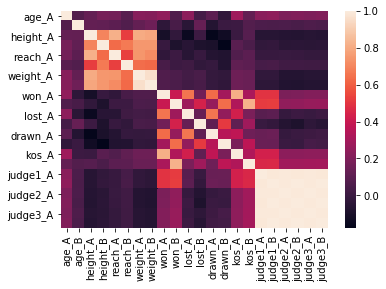

In [5]:
sns.heatmap(box.corr())

# Data preprocesing

We show all the NaN values in the initial DataSet.

We will remove useless columns that have almost every value to NaN. Also, we will impute values to columns that we need in order to remove the NaNs.

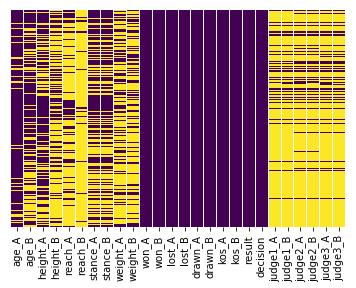

In [6]:
sns.heatmap(box.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [7]:
box.drop(['judge1_A', 'judge1_B', 'judge2_A', 'judge2_B', 'judge3_A', 'judge3_B', 'decision', 'reach_A', 'reach_B'], axis=1, inplace=True)

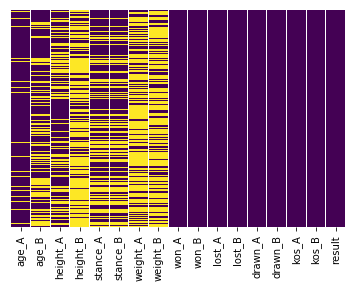

In [8]:
sns.heatmap(box.isnull(),yticklabels=False,cbar=False,cmap='viridis')

## Impute height and weight

For the NaNs in weight, I use the height due to the correlation between height and weight. The weight of the two boxers is almost the same, so we can use that too.

For the height, we use the weight in the same way but we have all the weights.

For the cases where we dont have any references, we use the mean. We precompute the mean because this way we dont compute it for every row(We went from 10 mins to 1 min).

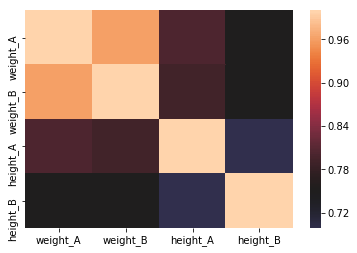

In [9]:
sns.heatmap(box[['weight_A', 'weight_B', 'height_A', 'height_B']].corr(), center=0.75)

In [10]:
weightMean = box['weight_A'].mean()

In [11]:
def impute_weight(cols):
    if pd.isna(cols[0]) and pd.isna(cols[1]): #weight
        if pd.isna(cols[2]) and pd.isna(cols[3]): #height
            return weightMean
        else:
            if not pd.isna(cols[2]):
                return cols[2]-20
            else:
                return cols[3]-20
    else:
        if pd.isna(cols[0]):
            return cols[1]
        else:
            return cols[0]

In [12]:
def impute_height(cols):
    weight = cols[1]
    if pd.isna(cols[0]):
        return weight+20
    else:
        return cols[0]

In [13]:
%%time
box['weight_A'] = box[['weight_A','weight_B', 'height_A', 'height_B']].apply(impute_weight,axis=1)
box['weight_B'] = box[['weight_A','weight_B', 'height_A', 'height_B']].apply(impute_weight,axis=1)

CPU times: user 55.6 s, sys: 24.2 ms, total: 55.6 s
Wall time: 55.5 s


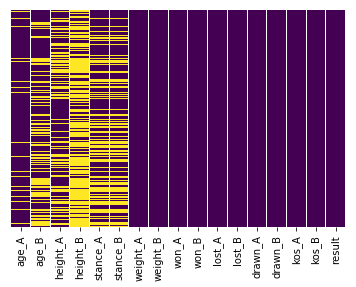

In [14]:
sns.heatmap(box.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [15]:
%%time
box['height_A'] = box[['height_A', 'weight_A']].apply(impute_height,axis=1)
box['height_B'] = box[['height_B', 'weight_B']].apply(impute_height,axis=1)

CPU times: user 41.1 s, sys: 24.1 ms, total: 41.1 s
Wall time: 41.1 s


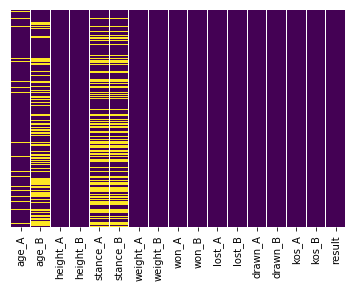

In [16]:
sns.heatmap(box.isnull(),yticklabels=False,cbar=False,cmap='viridis')

## Impute stance

Orthodox is the most common stance in boxing, so we use that.

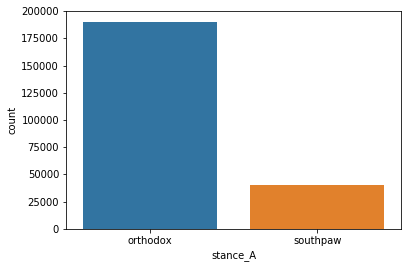

In [17]:
sns.countplot(x='stance_A',data=box)

In [18]:
def impute_stance(cols):
    if pd.isna(cols[0]):
        return 'orthodox'
    else: return cols[0]

In [19]:
%%time
box['stance_A'] = box[['stance_A']].apply(impute_stance,axis=1)
box['stance_B'] = box[['stance_B']].apply(impute_stance,axis=1)

CPU times: user 28.6 s, sys: 3.92 ms, total: 28.6 s
Wall time: 28.6 s


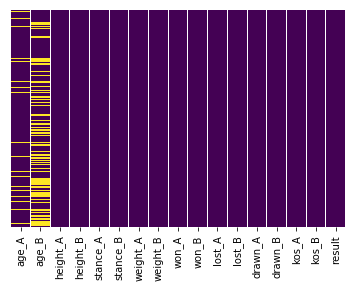

In [20]:
sns.heatmap(box.isnull(),yticklabels=False,cbar=False,cmap='viridis')

## Impute age

Same method.

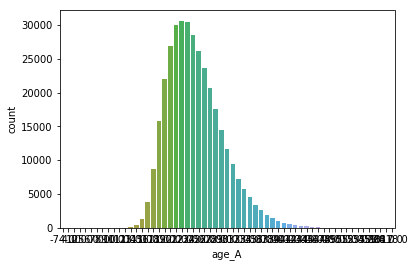

In [21]:
sns.countplot(x='age_A',data=box)

In [22]:
ageMean = (box['age_A'].mean() + box['age_B'].mean())/2
print(ageMean)

25.499692995660926


In [23]:
def impute_age(cols):
    if pd.isna(cols[0]):
        return ageMean
    else: return cols[0]

In [24]:
%%time
box['age_A'] = box[['age_A']].apply(impute_age,axis=1)
box['age_B'] = box[['age_B']].apply(impute_age,axis=1)

CPU times: user 32.3 s, sys: 31.1 ms, total: 32.4 s
Wall time: 32.3 s


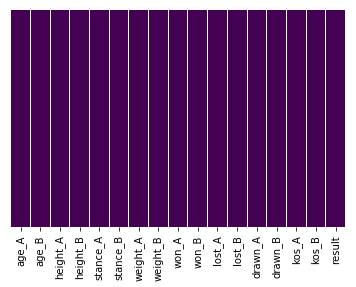

In [25]:
sns.heatmap(box.isnull(),yticklabels=False,cbar=False,cmap='viridis')

## Converting categorical variables

Using get_dummies() we convert the stance from a category to an indicator

In [26]:
stanceA = pd.get_dummies(box['stance_A'],drop_first=False)

In [27]:
stanceB = pd.get_dummies(box['stance_B'],drop_first=False)

In [28]:
box.drop(['stance_A', 'stance_B'], axis=1, inplace=True)

In [29]:
box = pd.concat([box,stanceA],axis=1)

In [30]:
box.drop(['southpaw'], axis=1, inplace=True)

In [31]:
box = box.rename(columns = {'orthodox':'orthodox_A'})

In [32]:
box = pd.concat([box,stanceB],axis=1)

In [33]:
box.drop(['southpaw'], axis=1, inplace=True)

In [34]:
box = box.rename(columns = {'orthodox':'orthodox_B'})

In [35]:
result = pd.get_dummies(box['result'],drop_first=True)

In [36]:
box = pd.concat([box, result], axis=1)

In [37]:
box.drop(['result', 'win_B'], axis=1, inplace=True)

In [38]:
box.drop(['drawn_A', 'drawn_B'], axis=1, inplace=True)

In [39]:
box = box.dropna()

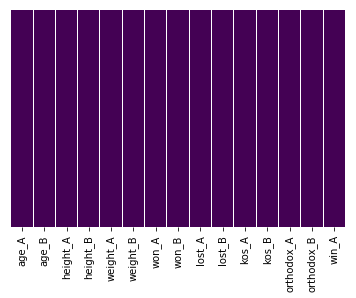

In [40]:
sns.heatmap(box.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [41]:
box.head()

,age_A,age_B,height_A,height_B,weight_A,weight_B,won_A,won_B,lost_A,lost_B,kos_A,kos_B,orthodox_A,orthodox_B,win_A
0,35.0,27.0,179.0,175.0,160.0,160.0,37,49,0,1,33,34.0,1,1,0
1,26.0,31.0,175.0,185.0,164.0,164.0,48,50,1,2,34,32.0,1,1,1
2,28.0,26.0,176.0,175.0,154.0,154.0,23,47,0,1,13,33.0,1,1,0
3,25.0,29.0,175.0,174.0,155.0,155.0,46,31,1,3,32,19.0,1,1,1
4,25.0,35.0,175.0,170.0,155.0,155.0,45,40,1,4,32,33.0,1,1,1


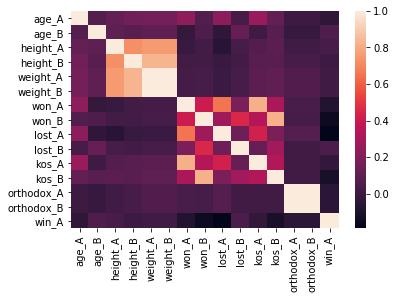

In [42]:
sns.heatmap(box.corr())

# Logistic Regression

In [43]:
from sklearn.model_selection import train_test_split

In [44]:
X_train, X_test, y_train, y_test = train_test_split(box.drop('win_A',axis=1), 
                                                    box['win_A'], test_size=0.30)

In [45]:
from sklearn.linear_model import LogisticRegression

In [46]:
logmodel = LogisticRegression()
logmodel.fit(X_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [47]:
predictions = logmodel.predict(X_test)

In [48]:
from sklearn.metrics import classification_report, confusion_matrix

In [49]:
print(classification_report(y_test,predictions))

             precision    recall  f1-score   support

          0       0.53      0.08      0.13     19802
          1       0.84      0.99      0.91     96403

avg / total       0.79      0.83      0.77    116205



In [50]:
print(confusion_matrix(y_test,predictions))

[[ 1525 18277]
 [ 1356 95047]]


# K Nearest Neighbours

## Choosing a K Value


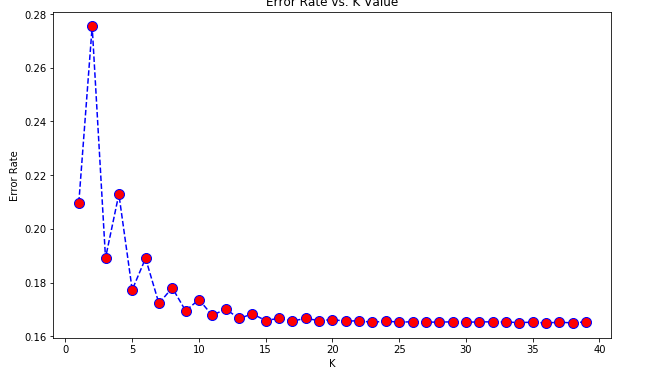

In [51]:
Image('BestK.png')

## Predicting

In [52]:
from sklearn.neighbors import KNeighborsClassifier

In [53]:
knn = KNeighborsClassifier(n_neighbors=11)

In [54]:
knn.fit(X_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=11, p=2,
           weights='uniform')

In [55]:
pred = knn.predict(X_test)

In [56]:
from sklearn.metrics import classification_report,confusion_matrix

In [57]:
print(confusion_matrix(y_test,pred))

[[ 2677 17125]
 [ 2490 93913]]


In [58]:
print(classification_report(y_test,pred))

             precision    recall  f1-score   support

          0       0.52      0.14      0.21     19802
          1       0.85      0.97      0.91     96403

avg / total       0.79      0.83      0.79    116205



# Random Forests

In [59]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(n_estimators=100)
rfc.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [60]:
rfc_pred = rfc.predict(X_test)

In [61]:
print(confusion_matrix(y_test,rfc_pred))

[[ 4984 14818]
 [ 2303 94100]]


In [62]:
print(classification_report(y_test,rfc_pred))

             precision    recall  f1-score   support

          0       0.68      0.25      0.37     19802
          1       0.86      0.98      0.92     96403

avg / total       0.83      0.85      0.82    116205

